# Volume I: Data Visualization. Solutions File.

In [2]:
import numpy as np
from scipy.stats import linregress
from matplotlib import rcParams, pyplot as plt
%matplotlib inline

rcParams["figure.figsize"] = (18,9)

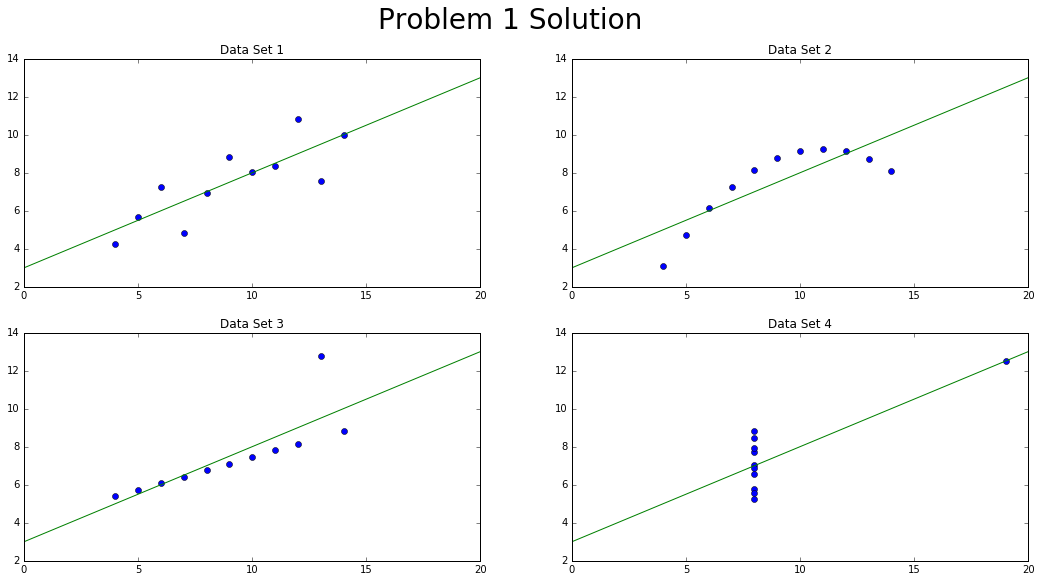

In [3]:
# Problem 1: Anscombe's quartet.

A = np.load("anscombe.npy")
x = np.linspace(0,20,200)
y = .5*x + 3
for i in xrange(4):
    plt.subplot(2,2,i+1)
    plt.plot(A[:,2*i], A[:,2*i+1], 'o')
    plt.plot(x,y)
    plt.title("Data Set {}".format(i+1))
_ = plt.suptitle("Problem 1 Solution", fontsize=28)

The student plots should look almost exactly like the ones shows above, and they should write a sentence or two about each set and how it is unique.
Sample answers might be something like the following:

**Data Set 1**: Randomly scattered around the regression line. The $x$-coordinates appear uniformly distributed.

**Data Set 2**: Parabolic, not linear. The $x$-values are nearly perfectly spaced.

**Data Set 3**: Linear, very close to the regression line. A single vertical outlier skews the regression.

**Data Set 4**: Linear. A single horizontal outlier skews the regression, but the rest of the points all have the same $x$-coordinate.

_**5 Points**_

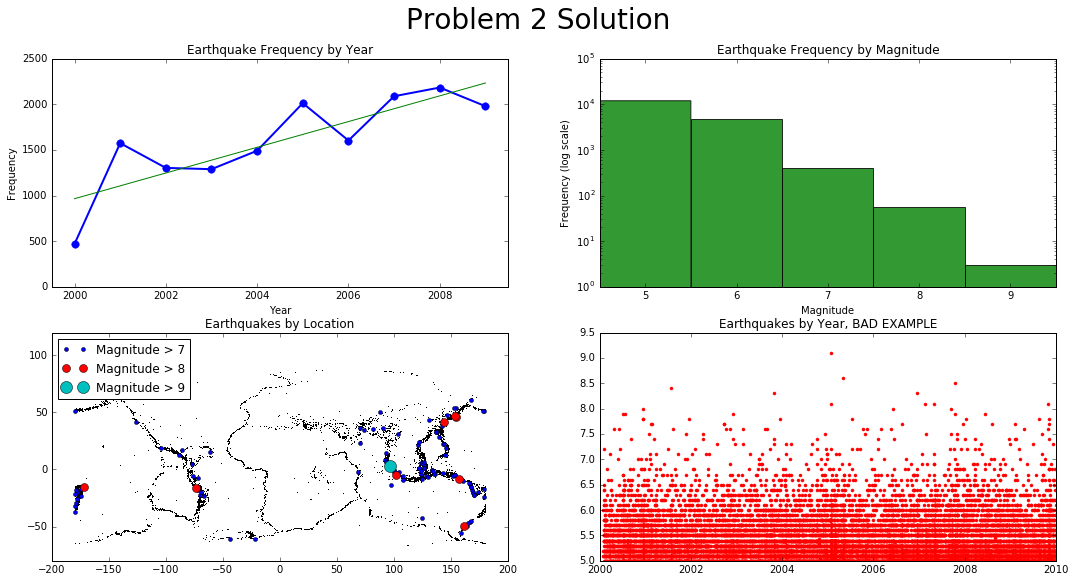

In [16]:
# Problem 2: Visualize the earthquake data.
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T

# Line plot of earthquakes per year.
plt.subplot(221)
xlimits = [1999.5, 2009.5]
counts, bin_edges = np.histogram(years, bins=10, range=xlimits)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts, '.-', lw=2, ms=15)

# Linear regression line.
slope, intercept = linregress(bin_centers, counts)[:2]
plt.plot(bin_centers, bin_centers*slope + intercept, 'g')

plt.xlim(xlimits)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Earthquake Frequency by Year")

# Histogram of earthquake magnitudes.
plt.subplot(222)
xlimits = [4.5, 9.5]
plt.hist(magnitudes, range=xlimits, bins=5, log=True, color='g', alpha=.8)
plt.xlim(xlimits)
plt.xlabel("Magnitude")
plt.ylabel("Frequency (log scale)")
plt.title("Earthquake Frequency by Magnitude")

# Scatter plot of lattitudes versus longitudes to show where earthquakes happen.
plt.subplot(223)
plt.plot(longitude, latitude, 'k,')
plt.gca().set_aspect("equal")

# Identify bigger earthquakes with colored dots.
index = (8 > magnitudes) * (magnitudes > 7)
plt.plot(longitude[index], latitude[index], 'bo', ms=4, label="Magnitude > 7")
index = (9 > magnitudes) * (magnitudes > 8)
plt.plot(longitude[index], latitude[index], 'ro', ms=8, label="Magnitude > 8")
index = magnitudes > 9
plt.plot(longitude[index], latitude[index], 'co', ms=12, label="Magnitude > 9")
plt.ylim(ymax=120)
plt.legend(loc="upper left")
plt.title("Earthquakes by Location")

# Bad example.
plt.subplot(224)
plt.plot(years, magnitudes, 'r.')
plt.title("Earthquakes by Year, BAD EXAMPLE")

_ = plt.suptitle("Problem 2 Solution", fontsize=28)

The student should produce 2 or 3 plots.
They do not have to be exactly like the ones shown above, but they should address the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

_**10 points**_